In [1]:
import pandas as pd
import numpy as np
import os
from io import StringIO
import re
import csv

from tabulate import tabulate


import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

from textwrap import wrap

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 9]

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 400)

os.getcwd()

'/Users/lubagloukhov/Documents/Consulting/PiqueSolutions/JavaSE_202007/scripts'

In [3]:
mod_df = pd.read_csv('../data/output/mod_df.csv')  
catg_dummy_list = open('../data/output/catg_dummy_list.csv').read().splitlines()
cont_dummy_list = open('../data/output/cont_dummy_list.csv').read().splitlines()
dummy0_dummy_list = open('../data/output/dummy0_dummy_list.csv').read().splitlines()
exlc_dummy_list = open('../data/output/exlc_dummy_list.csv').read().splitlines()
map_df = pd.read_csv('../data/output/map_df.csv')
varkey = pd.read_csv('../data/output/QuestionPro_varkey.csv')

In [4]:

y0_list = ['Sat_Org_EclipseIDE',
 'Sat_Org_IntelliJIDE',
 'Sat_Org_JDeveloper',
 'Sat_Org_NetBeansIDE',
 'Sat_Org_RationalAppDev',
 'Sat_Org_VisualStudio',
 'Sat_Org_Other']
y1_list = ['Sat_Org_JavaSEAMC', 
 'Sat_Org_JavaSEAMC_UsageLog',
 'Sat_Org_JavaSEDepRuleSet',
 'Sat_Org_JavaSEMSICustTools',
 'Sat_Org_JavaSEFlightRec']
y2_list = ['OJavaSESubscription_Elem_Sat_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_Monitoring',
 'OJavaSESubscription_Elem_Sat_Org_MyOSupport',
 'OJavaSESubscription_Elem_Sat_Org_AccessCloud',
 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Sat_Org_LegacyJava',
 'OJavaSESubscription_Elem_Sat_Org_Other']
y3_list = ['OJavaSESubscription_Attr_Sat_CommMethods',
 'OJavaSESubscription_Attr_Sat_PhoneSupport',
 'OJavaSESubscription_Attr_Sat_SSKnowledge',
 'OJavaSESubscription_Attr_Sat_CoNeedsUnd',
 'OJavaSESubscription_Attr_Sat_TrainingQual',
 'OJavaSESubscription_Attr_Sat_RepsonseTime']

In [5]:
x0_list = ['Use_Org_EclipseIDE',
 'Use_Org_IntelliJIDE',
 'Use_Org_JDeveloper',
 'Use_Org_NetBeansIDE',
 'Use_Org_RationalAppDev',
 'Use_Org_VisualStudio',
 'Use_Org_Other']

x1_list = ['Use_Org_JavaSEAMC',
 'Use_Org_JavaSEAMC_UsageLog',
 'Use_Org_JavaSEDepRuleSet',
 'Use_Org_JavaSEMSICustTools',
 'Use_Org_JavaSEFlightRec']
x2_list = ['OJavaSESubscription_Elem_Imp_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Imp_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Imp_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Imp_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Imp_Org_Monitoring',
 'OJavaSESubscription_Elem_Imp_Org_MyOSupport',
 'OJavaSESubscription_Elem_Imp_Org_AccessCloud',
 'OJavaSESubscription_Elem_Imp_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Imp_Org_LegacyJava',
 'OJavaSESubscription_Elem_Imp_Org_Other']
x3_list = ['OJavaSESubscription_Attr_Imp_CommMethods',
 'OJavaSESubscription_Attr_Imp_PhoneSupport',
 'OJavaSESubscription_Attr_Imp_SSKnowledge',
 'OJavaSESubscription_Attr_Imp_CoNeedsUnd',
 'OJavaSESubscription_Attr_Imp_TrainingQual',
 'OJavaSESubscription_Attr_Imp_RepsonseTime']

In [6]:
modw_df = mod_df.copy()

temp = mod_df[y0_list] * mod_df[x0_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y1_list] * mod_df[x1_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y2_list] * mod_df[x2_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y3_list] * mod_df[x3_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

print(len(y3_list)+len(y2_list)+len(y1_list)+len(y0_list))
print(modw_df.shape)

29
(228, 264)


In [7]:
y0w_list = [x+"_w" for x in y0_list]
y1w_list = [x+"_w" for x in y1_list]
y2w_list = [x+"_w" for x in y2_list]
y3w_list = [x+"_w" for x in y3_list]

In [8]:
varkey.head()

,var,val,Q,A,A_short,grp,grp_str
0,Job_Title,1,What is your job title?,CIO or CTO,NaN,1.0,Teach Lead
1,Job_Title,2,What is your job title?,IT Director or Manager,NaN,1.0,Teach Lead
2,Job_Title,3,What is your job title?,Application Developer,NaN,2.0,Application Owner
3,Job_Title,4,What is your job title?,Application Manager,NaN,2.0,Application Owner
4,Job_Title,5,What is your job title?,Application Development Lead,NaN,2.0,Application Owner


In [85]:

varkey.index = varkey.agg('{0[var]}_{0[val]}'.format, axis=1)

# Frequencies for all Questions

In [267]:
# len(catg_dummy_list)+len(cont_dummy_list)+len(dummy0_dummy_list)

# Basic Graph
## Used for var = ['Country_Code']

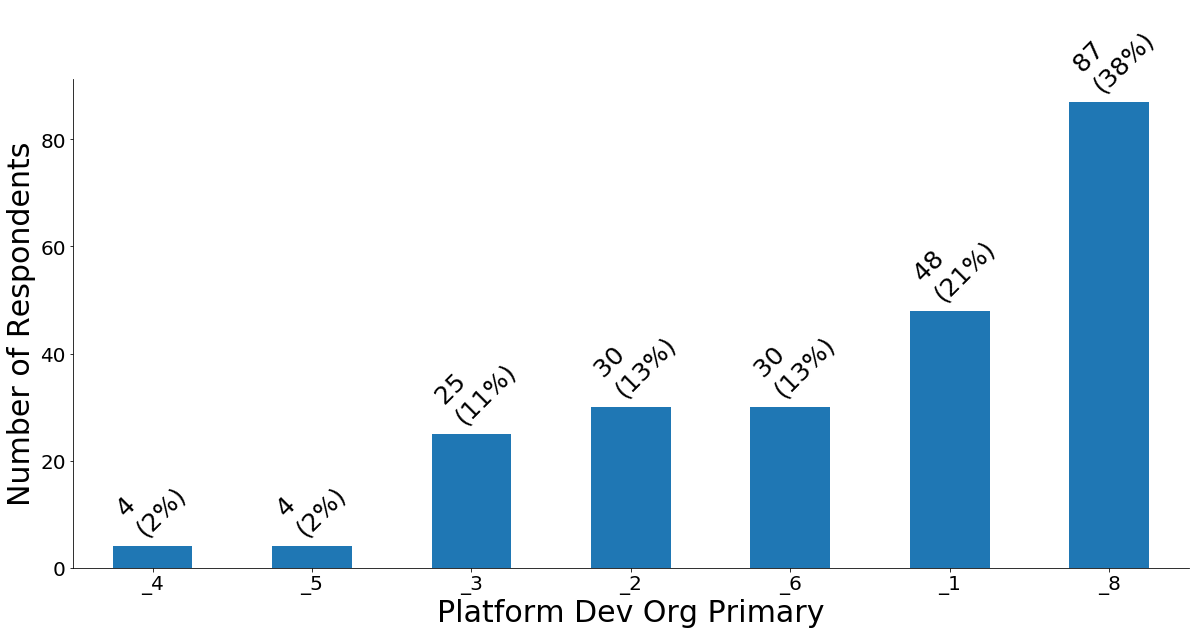

In [351]:
var = "Platform_Dev_Org_Primary"
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = temp.rename(lambda x: x.replace(var,''))
temp = temp[temp < 228]

ax = temp[:,].plot.bar(rot=0, fontsize = 20)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

# Basic Graph - numeric Input
## Used for ['Java_Dev_Org', 'Java_Dev_Org',
 'Java_Dev_Dist_JVM',
 'Java_Dev_Dist_Python',
 'Java_Dev_Dist_JavaScript',
 Platform_Dev_Org_LRHEL_P',
'Platform_Dev_Org_LOracle_P',
'Platform_Dev_Org_LUbuntu_P',
'Platform_Dev_Org_LSUSE_P',
'Platform_Dev_Org_LinuxOther_P',
'Platform_Dev_Org_MacOS_P',
'Platform_Dev_Org_Solaris_P',
/Platform_Dev_Org_Windows_P',]

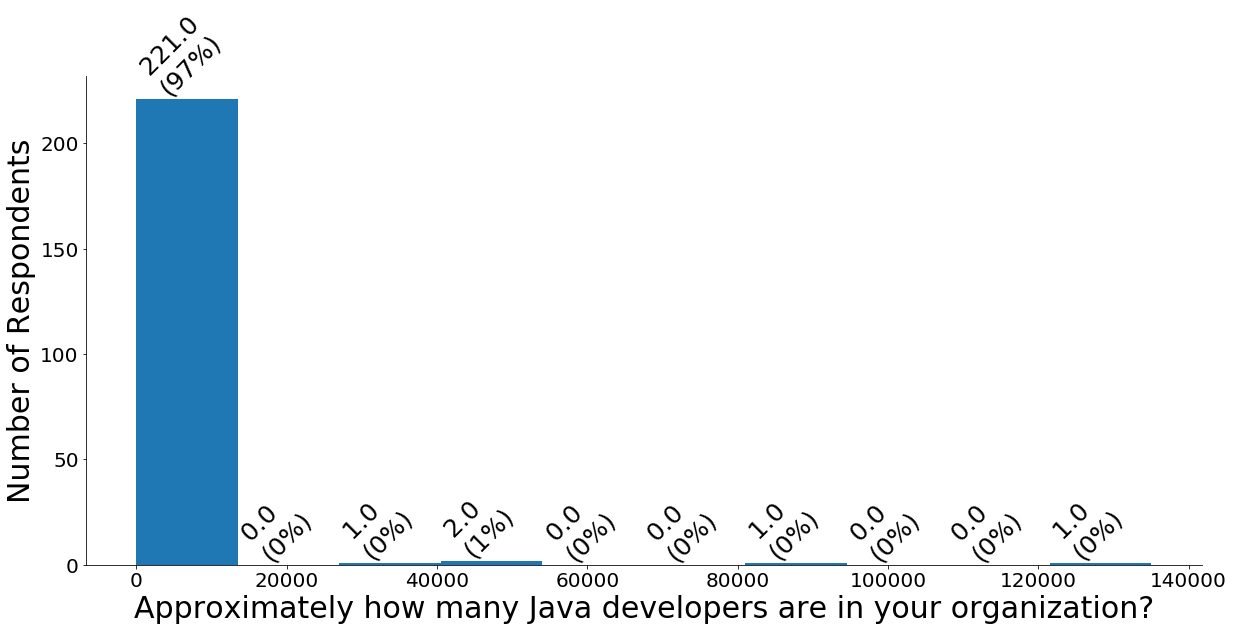

In [344]:
var = "Java_Dev_Org"
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp[var] = [round(t,0) for t in temp[var].astype('int')]

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("Approximately how many Java developers are in your organization?", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

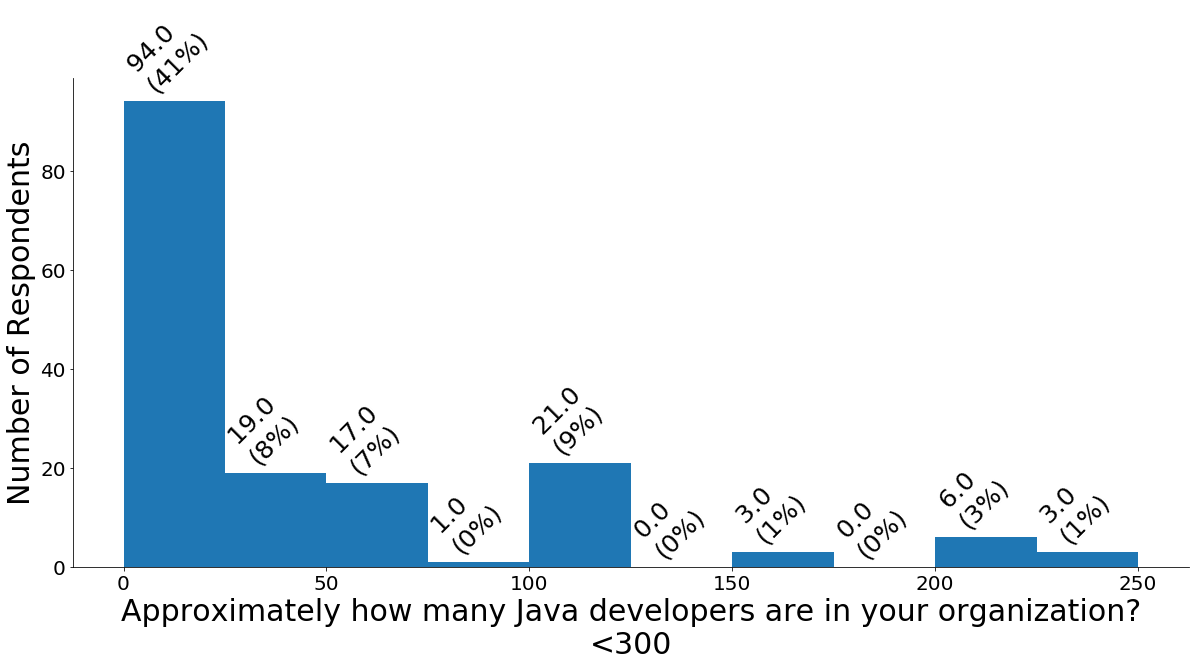

In [340]:
var = "Java_Dev_Org"
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp[temp<300]

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("Approximately how many Java developers are in your organization?\n<300", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

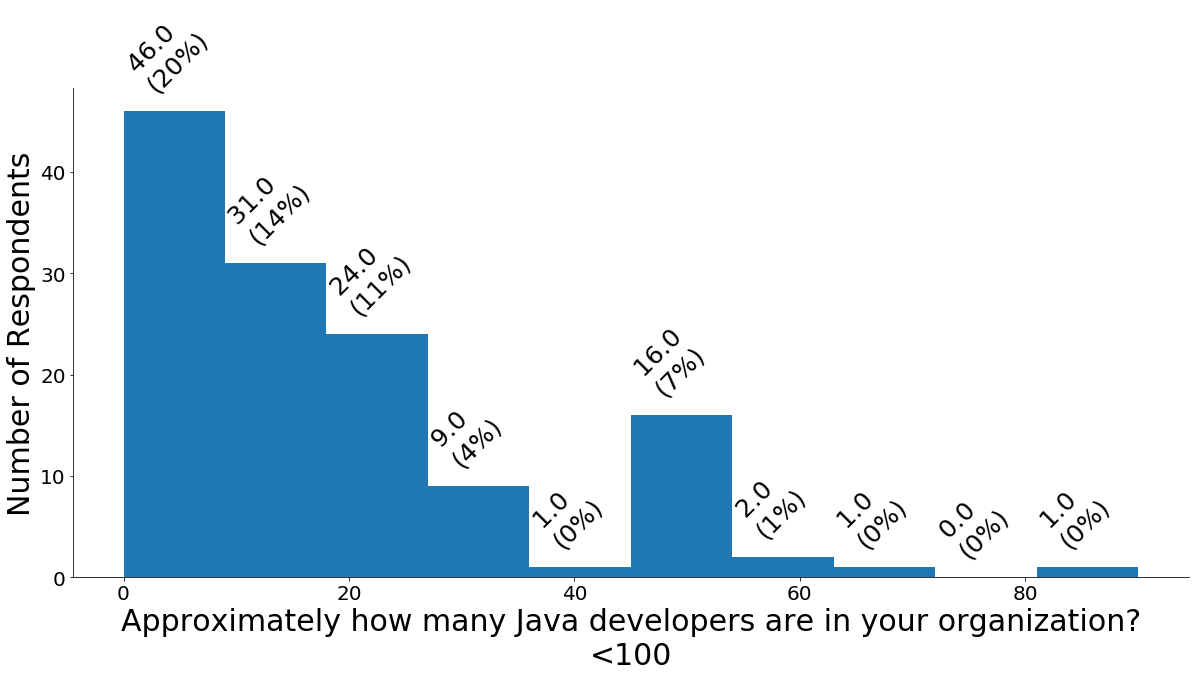

In [339]:
var = "Java_Dev_Org"
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp[temp<100]

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("Approximately how many Java developers are in your organization?\n<100", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

In [114]:
bins = [0, 10, 50, 300, np.inf]
names = ['<10', '10-49', '50-299', '300+']

var = "Java_Dev_Org"
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')


temp['grp_str'] = pd.cut(temp.Java_Dev_Org, bins=bins, right=False, labels=labels)
temp.head()

,Java_Dev_Org,grp_str
0,90,50-299
1,500,300+
2,100,50-299
3,5000,300+
4,500,300+


In [ ]:
# for var2 in y0_list+x0_list+y1_list+x1_list+y2_list+x2_list+y3_list+x3_list:
# for var2 in mod_df.filter(regex='OJavaSESubscription_OrgPurch_Imp_').columns.values:
# for var2 in mod_df.filter(regex='OJavaSESubscription_Alts_Top3_').columns.values:
for var2 in mod_df.filter(regex='Information_Channel_Imp_').columns.values:
    if 'comment' not in var2.lower():
        var1= 'App_Dev_Outsource'

        title = varkey[(varkey['var']==var2)].Q.values[0]
        title = title.replace('Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. ',
                             '')
        title = title.replace('On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, p',
                             'P')
        title = '\n'.join(wrap(title, 80))

        grouped = mod_df.groupby(var1)[var2]

        ncols=2
        nrows = int(np.ceil(grouped.ngroups/ncols))

        fig, axes = plt.subplots(nrows=nrows, ncols=ncols)

        for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
            grouped.get_group(key).plot.hist(ax=ax,legend=None)
            subtitle = varkey[(varkey['var']==var1)&(varkey['val']==key)].A.values[0]
            ax.set_title(subtitle,size=15)
            ax.set_ylabel("Number of Respondents")
            fig.subplots_adjust(hspace = .5)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.grid()

        fig.suptitle(title,size=20, fontweight='bold')
#         fig.savefig("../data/output/slides/xtabs/xy_outsource/"+var2+"_"+var1+".jpeg",bbox_inches='tight')
#         fig.savefig("../data/output/slides/xtabs/purch_outsource/"+var2+"_"+var1+".jpeg",bbox_inches='tight')
#         fig.savefig("../data/output/slides/xtabs/alt_outsource/"+var2+"_"+var1+".jpeg",bbox_inches='tight')
        fig.savefig("../data/output/slides/xtabs/ichan_outsource/"+var2+"_"+var1+".jpeg",bbox_inches='tight')
        ax.clear()

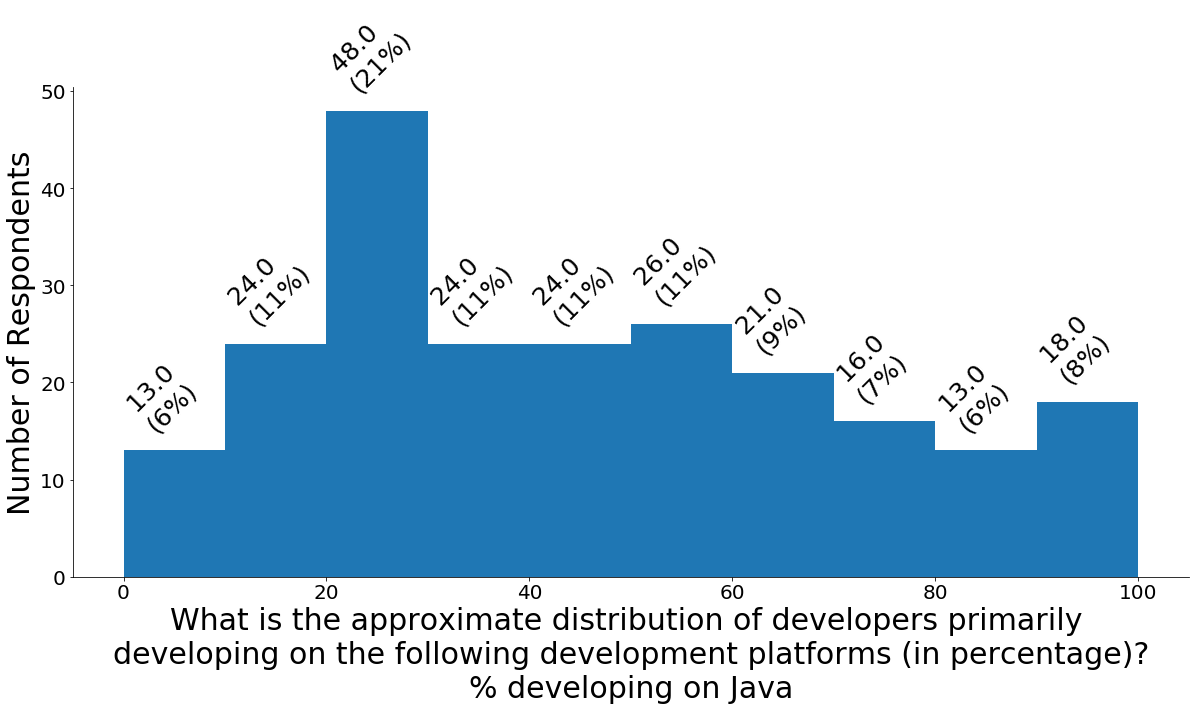

In [345]:
var = "Java_Dev_Dist_Org" #  'Java_Dev_Dist_Org',
#  'Java_Dev_Dist_JVM',
#  'Java_Dev_Dist_Python',
#  'Java_Dev_Dist_JavaScript',
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp.astype('int')

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(int(round(p.get_height(),0))) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("What is the approximate distribution of developers primarily \ndeveloping on the following development platforms (in percentage)?\n% developing on Java", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

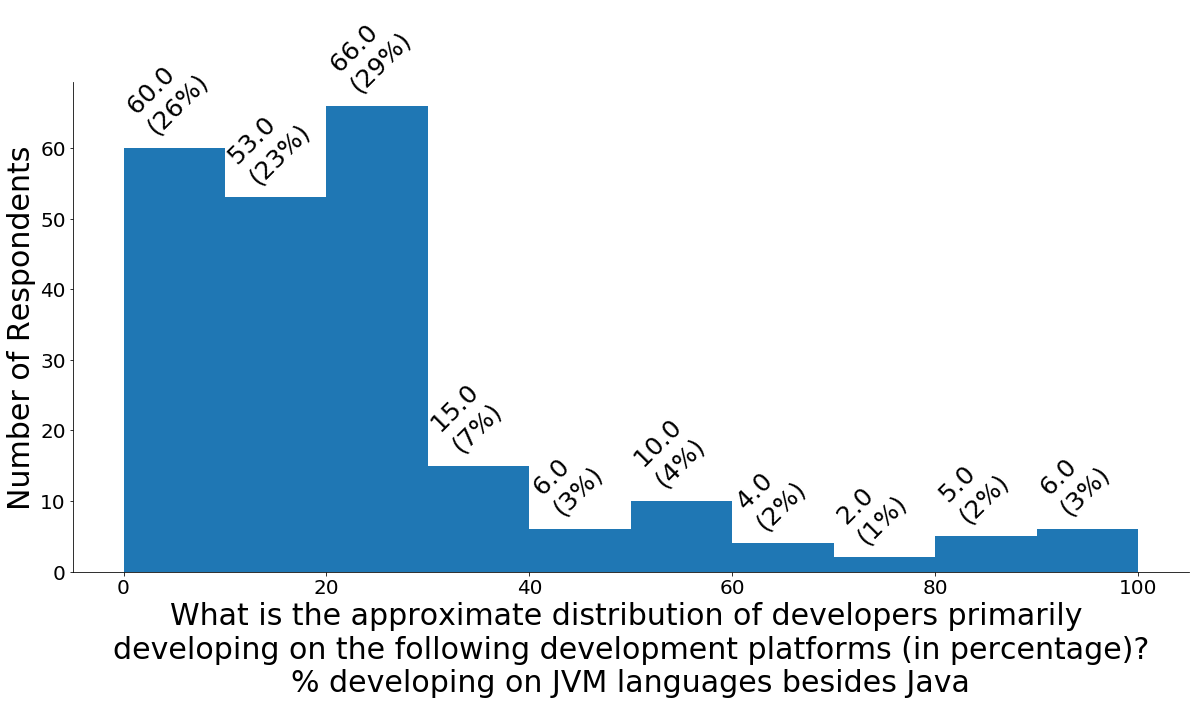

In [347]:
var = "Java_Dev_Dist_JVM" #  'Java_Dev_Dist_Org',
#  'Java_Dev_Dist_JVM',
#  'Java_Dev_Dist_Python',
#  'Java_Dev_Dist_JavaScript',
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp.astype('int')

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(int(round(p.get_height(),0))) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("What is the approximate distribution of developers primarily \ndeveloping on the following development platforms (in percentage)?\n% developing on JVM languages besides Java", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

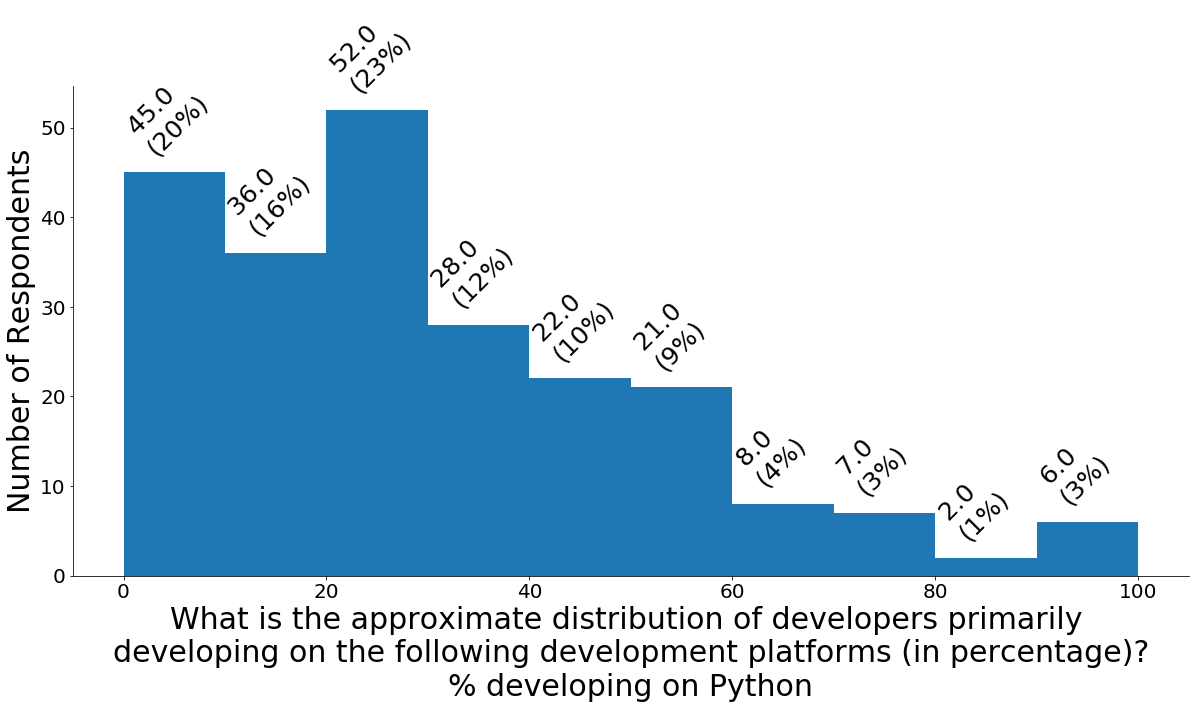

In [349]:
var = "Java_Dev_Dist_Python" #  'Java_Dev_Dist_Org',
#  'Java_Dev_Dist_JVM',
#  'Java_Dev_Dist_Python',
#  'Java_Dev_Dist_JavaScript',
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp.astype('int')

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(int(round(p.get_height(),0))) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("What is the approximate distribution of developers primarily \ndeveloping on the following development platforms (in percentage)?\n% developing on Python", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

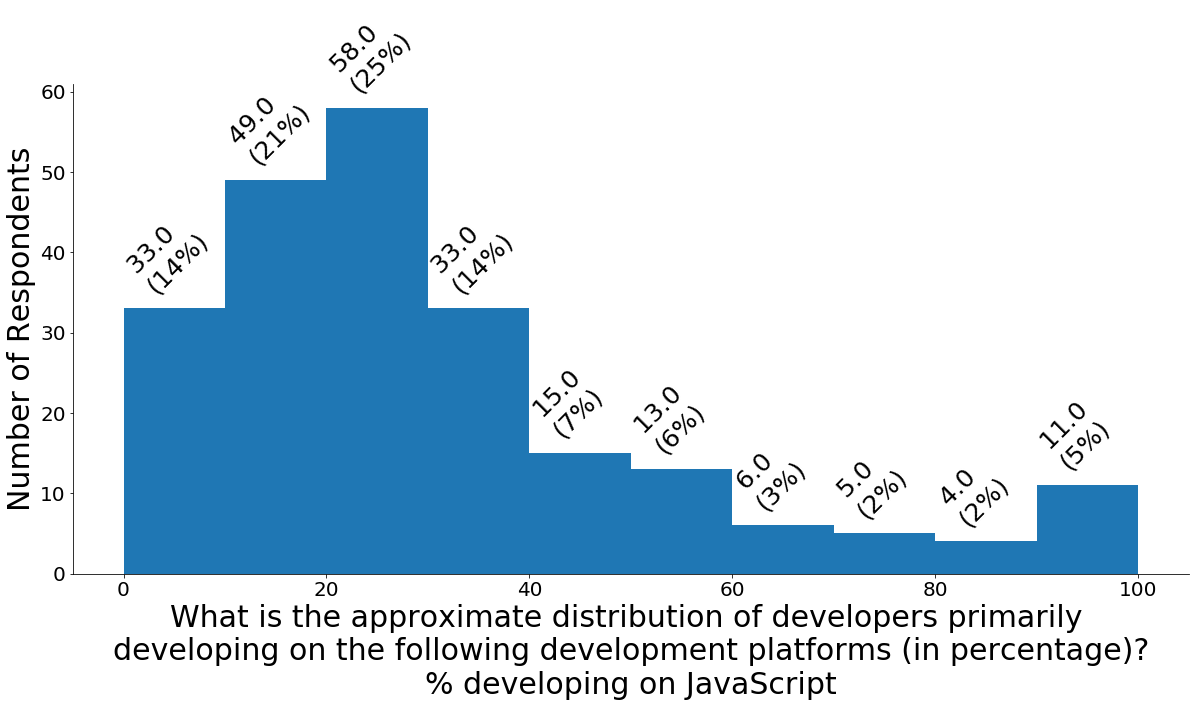

In [350]:
var = "Java_Dev_Dist_JavaScript" #  'Java_Dev_Dist_Org',
#  'Java_Dev_Dist_JVM',
#  'Java_Dev_Dist_Python',
#  'Java_Dev_Dist_JavaScript',
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp.astype('int')

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(int(round(p.get_height(),0))) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("What is the approximate distribution of developers primarily \ndeveloping on the following development platforms (in percentage)?\n% developing on JavaScript", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

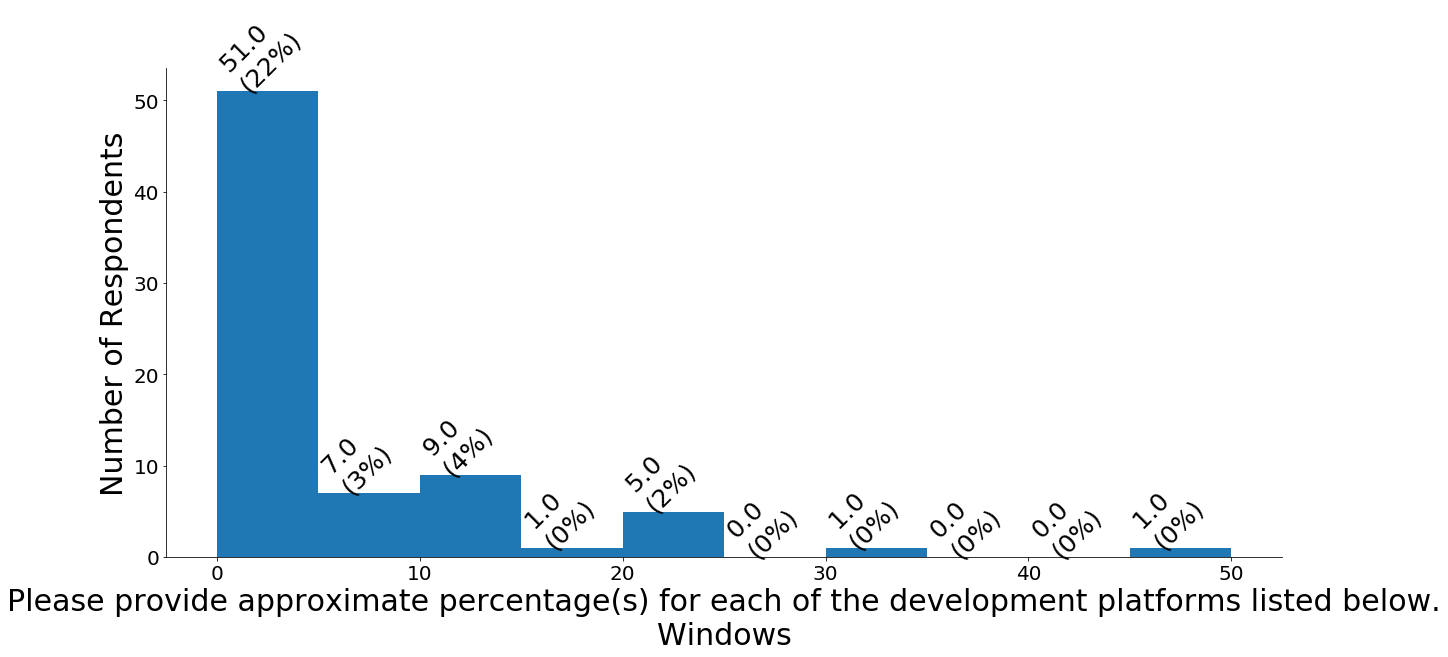

In [22]:
var = "Platform_Dev_Org_Solaris_P" #  Platform_Dev_Org_LRHEL_P',
# Platform_Dev_Org_LOracle_P',
# Platform_Dev_Org_LUbuntu_P',
# Platform_Dev_Org_LSUSE_P',
# Platform_Dev_Org_LinuxOther_P',
# Platform_Dev_Org_MacOS_P',
# Platform_Dev_Org_Solaris_P',
# Platform_Dev_Org_Windows_P',
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp.astype('int')

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(int(round(p.get_height(),0))) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("Please provide approximate percentage(s) for each of the development platforms listed below.\nWindows",
                  size=30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()), size=25, rotation=45)

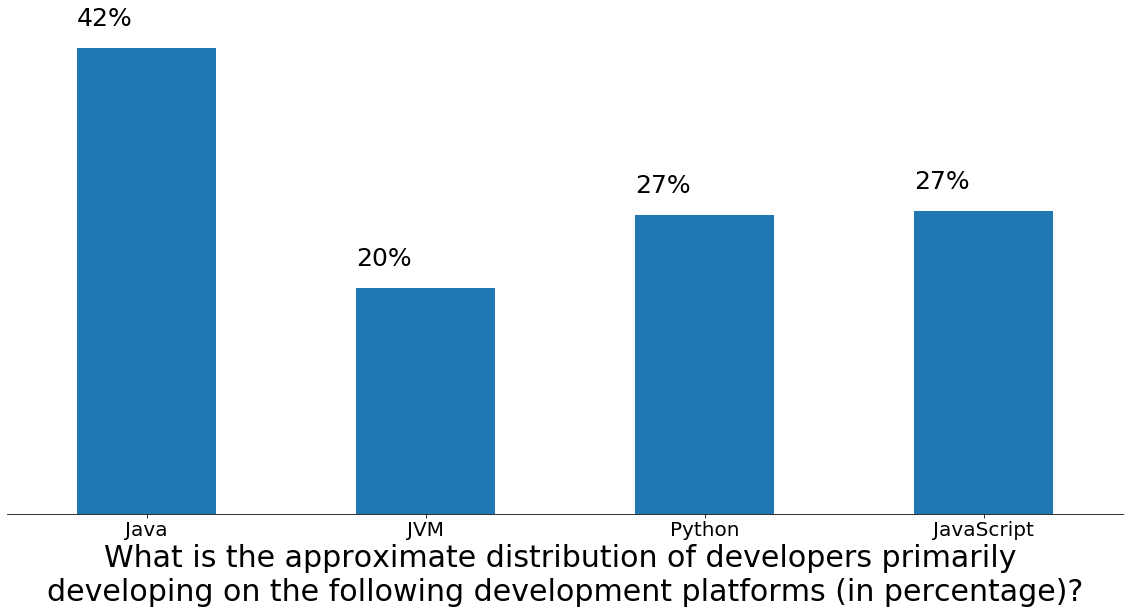

In [30]:
var = "Java_Dev_Dist" #  'Java_Dev_Dist_Org',
#  'Java_Dev_Dist_JVM',
#  'Java_Dev_Dist_Python',
#  'Java_Dev_Dist_JavaScript',
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp.astype('int')

temp = pd.DataFrame(temp.mean())
temp

# #.sum().sort_values(ascending=True)
# # temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.bar(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(int(round(p.get_height(),0)))+"%"
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_xticklabels(['Java','JVM','Python','JavaScript'])
    ax.set_yticks([])
#     ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("What is the approximate distribution of developers primarily \ndeveloping on the following development platforms (in percentage)?", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=0)

In [28]:
temp

,0
Java_Dev_Dist_Org,42.233480
Java_Dev_Dist_JVM,20.488987
Java_Dev_Dist_Python,27.136564
Java_Dev_Dist_JavaScript,27.484581


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127590a58>]],
      dtype=object)

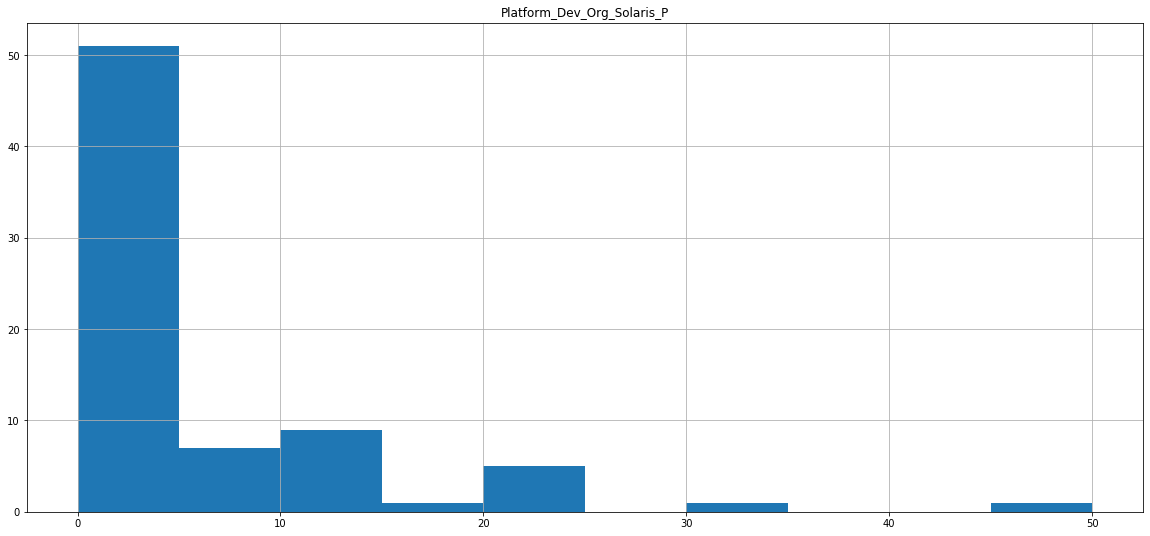

In [26]:
temp.hist()

Platform_Dev_Org_LOracle_P
Platform_Dev_Org_LRHEL_P
Platform_Dev_Org_LSUSE_P
Platform_Dev_Org_LUbuntu_P
Platform_Dev_Org_LinuxOther_P
Platform_Dev_Org_MacOS_P
Platform_Dev_Org_Primary
Platform_Dev_Org_Solaris_P
Platform_Dev_Org_Windows_P


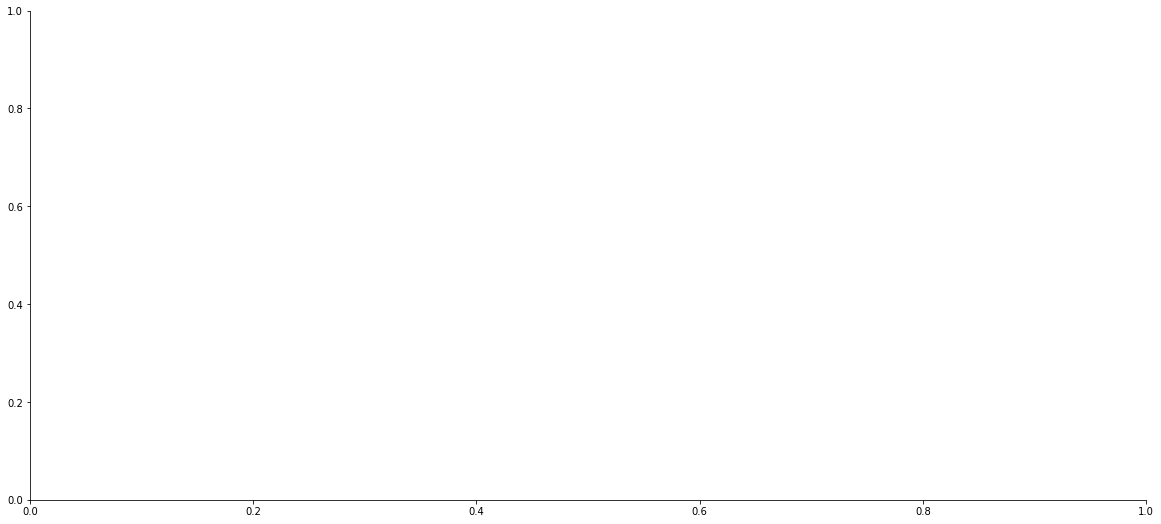

In [27]:
for var in np.unique(varkey['var'][varkey['var'].str.contains('Platform_Dev_Org_')].values):
    print(var)
    temp = modw_df[var].dropna().astype('int32')
    temp = temp.astype('int')
    # temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
    temp = temp.sort_index()

    var_str = varkey[varkey['var']==var].Q.values[0]
    var_str = '\n'.join(wrap(var_str, 75))


    ax = temp.iloc[:,].plot.hist(rot=45, fontsize = 20,legend=None)

    for p in ax.patches:
        ann_txt = r"""{0} ({1}%)""".format(p.get_height().astype(int), (int(round(p.get_height()/228*100))))

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(var_str, size =30)
        ax.set_ylabel("Number of Respondents", size =30)
        ax.annotate(ann_txt,
                   (p.get_x(), p.get_height()), size=25, rotation=45)
    
    fig = ax.get_figure()
    fig.savefig("../data/output/slides/Platform_Dev_Org/"+var+".jpeg",bbox_inches='tight')
    ax.clear()



In [19]:
var

'Platform_Dev_Org_Windows_P'

In [21]:
temp[temp>90].dropna().shape

(29,)

# Basic Graph - numeric Input w/ Mapping
## used for Sat, Use & Imp vars

In [11]:
var_list = varkey['var'][varkey['var'].str.contains('Use|Imp|Sat')].drop_duplicates().values
var_list[:10]

array(['Use_Org_EclipseIDE', 'Sat_Org_EclipseIDE', 'Use_Org_IntelliJIDE',
       'Sat_Org_IntelliJIDE', 'Use_Org_JDeveloper', 'Sat_Org_JDeveloper',
       'Use_Org_NetBeansIDE', 'Sat_Org_NetBeansIDE',
       'Use_Org_RationalAppDev', 'Sat_Org_RationalAppDev'], dtype=object)

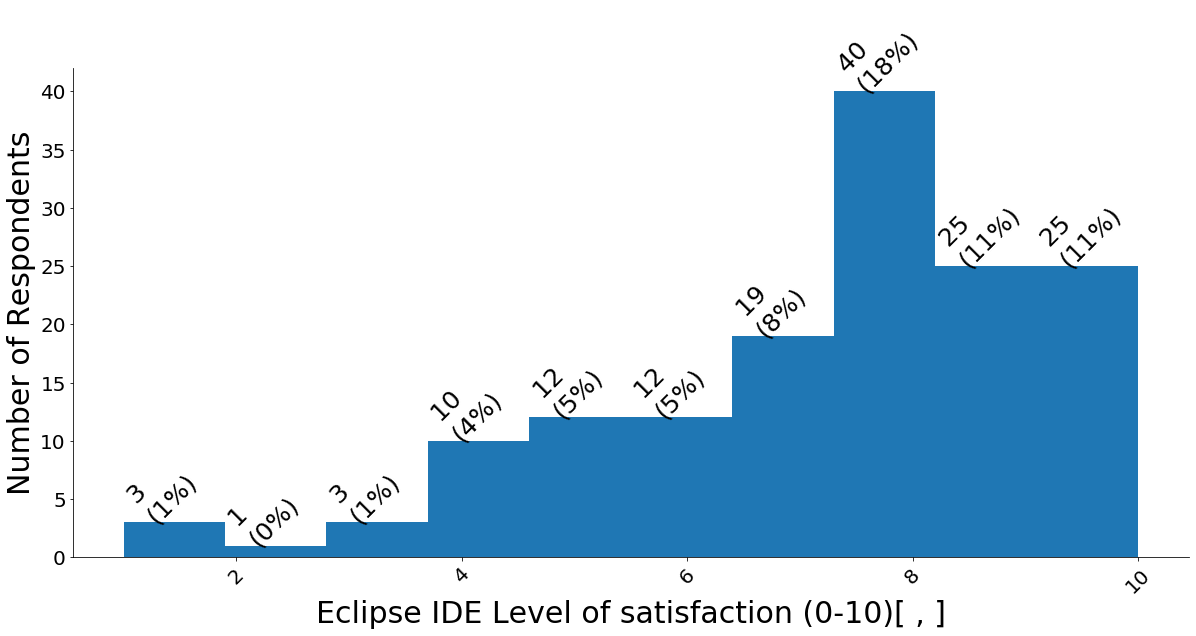

In [461]:
var = var_list[1]

temp = modw_df[var].dropna().astype('int32')
temp = temp.astype('int')
# temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp = temp[temp<228]
temp = temp[temp>0]

var_str = varkey[varkey['var']==var].Q.values[0]
var_str = '\n'.join(wrap(var_str, 75))


ax = temp.iloc[:,].plot.hist(rot=45, fontsize = 20,legend=None)

for p in ax.patches:
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height().astype(int), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()), size=25, rotation=45)


fig = ax.get_figure()
fig.savefig("../data/output/"+var+".jpeg")

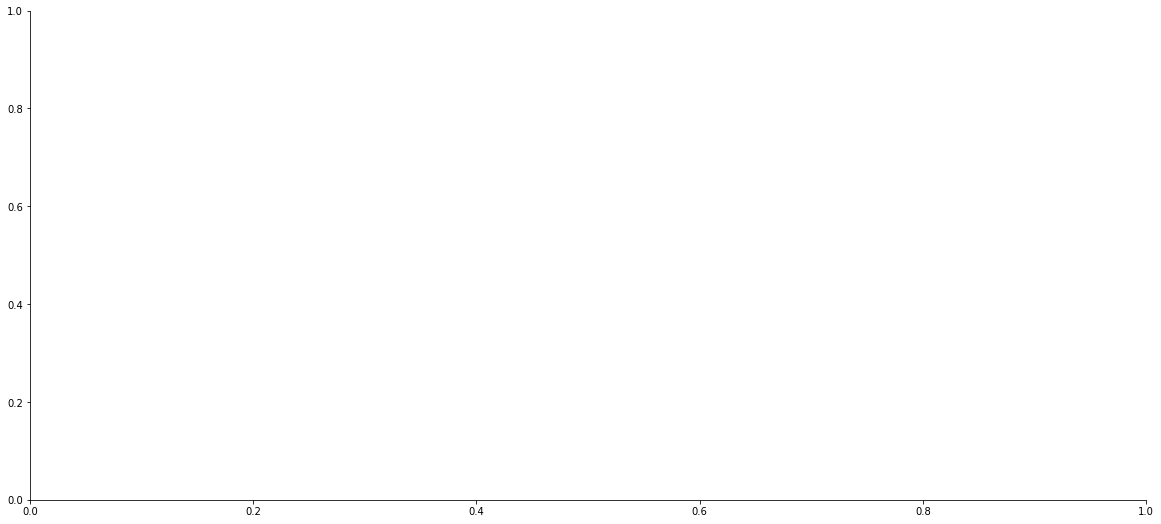

In [37]:
for var in var_list[0:50]:
    temp = modw_df[var].dropna().astype('int32')
    temp = temp.astype('int')
    # temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
    temp = temp.sort_index()

    var_str = varkey[varkey['var']==var].Q.values[0]
    var_str = '\n'.join(wrap(var_str, 75))


    ax = temp.iloc[:,].plot.hist(rot=45, fontsize = 20,legend=None)

    for p in ax.patches:
        ann_txt = r"""{0} ({1}%)""".format(p.get_height().astype(int), (int(round(p.get_height()/228*100))))

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(var_str, size =30)
        ax.set_ylabel("Number of Respondents", size =30)
        ax.annotate(ann_txt,
                   (p.get_x(), p.get_height()), size=25, rotation=45)
    
    fig = ax.get_figure()
    fig.savefig("../data/output/slides/use_sat_imp/1/"+var+".jpeg",bbox_inches='tight')
    ax.clear()



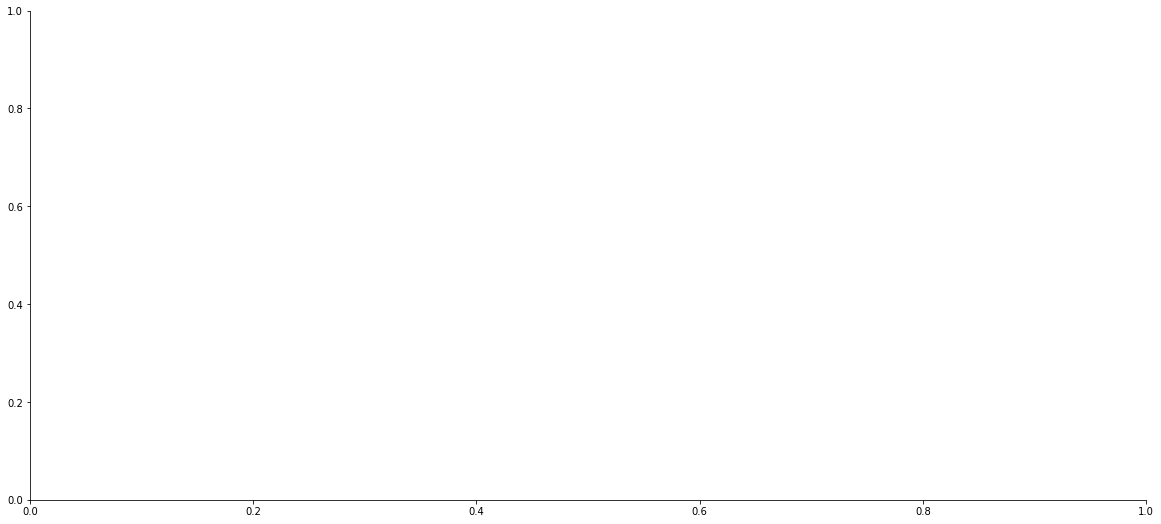

In [30]:
for var in var_list[50:]:
    temp = modw_df[var].dropna().astype('int32')
    temp = temp.astype('int')
    # temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
    temp = temp.sort_index()

    var_str = varkey[varkey['var']==var].Q.values[0]
    var_str = '\n'.join(wrap(var_str, 75))


    ax = temp.iloc[:,].plot.hist(rot=45, fontsize = 20,legend=None)

    for p in ax.patches:
        ann_txt = r"""{0} ({1}%)""".format(p.get_height().astype(int), (int(round(p.get_height()/228*100))))

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(var_str, size =30)
        ax.set_ylabel("Number of Respondents", size =30)
        ax.annotate(ann_txt,
                   (p.get_x(), p.get_height()), size=25, rotation=45)
    
    fig = ax.get_figure()
    fig.savefig("../data/output/slides/use_sat_imp/2/"+var+".jpeg",bbox_inches='tight')
    ax.clear()



In [31]:
len(var_list)

86

In [33]:
len(var_list[50:])

36

In [36]:
len(var_list[:50])

50

# Mapping Graph
## Used for var =['Job_Title', 'Company_Industry', 'Company_Revenue', 'OracleJavaSESubscription_Org_Duration','Java_App_Org_Deploy_2020', 'OracleJavaSESubscription_Ind_Role', 'Government_Org_Ind_Employee', App_Dev_Outsource, Platform_Dev_Org_Primary]

In [362]:
varkey['var'].drop_duplicates().values

array(['Job_Title', 'Company_Industry', 'Company_Revenue',
       'OracleJavaSESubscription_Org_Duration',
       'Java_App_Org_Deploy_2020', 'OracleJavaSESubscription_Ind_Role',
       'Government_Org_Ind_Employee', 'App_Dev_Outsource',
       'Platform_Dev_Org_Primary'], dtype=object)

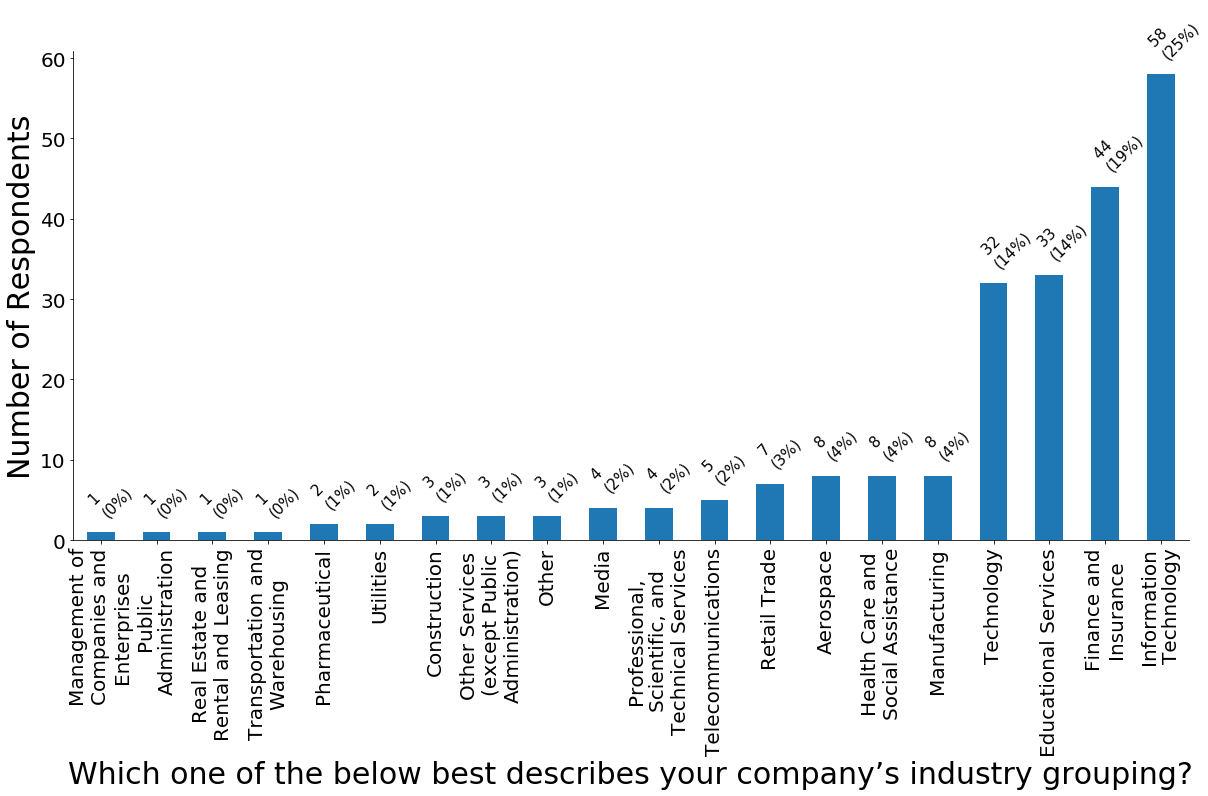

In [76]:
var = 'Company_Industry'
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp = temp[temp.freq<228]
temp = temp[temp.freq>0]
temp.freq = temp.freq.astype('int')

var_str = temp.Q.values[0]
var_str = '\n'.join(wrap(var_str, 75))


temp.A =  [ '\n'.join(wrap(l, 20)) for l in temp.A ] 



ax = temp.iloc[:,].sort_values('freq').plot.bar(x='A', y='freq', fontsize = 20,
                                                 legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
#     ax.get_legend().remove()
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=15, rotation=45)

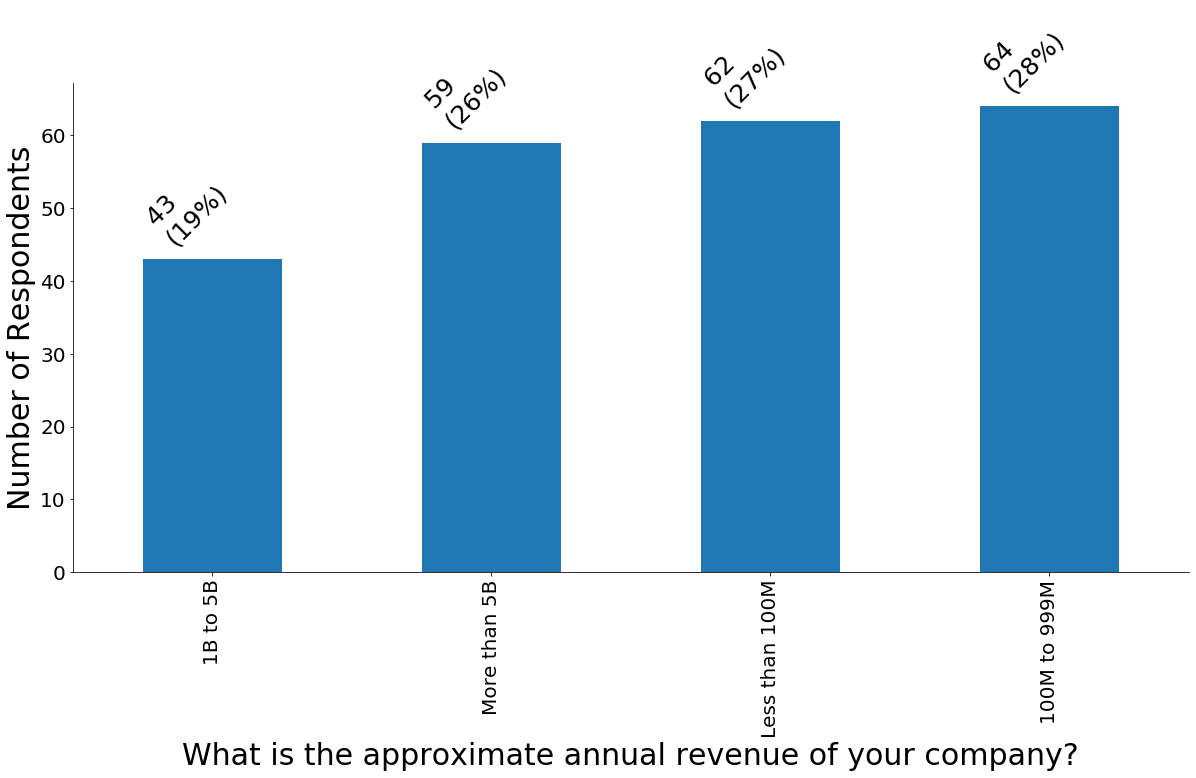

In [74]:
var = 'Company_Revenue'
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp = temp[temp.freq<228]
temp = temp[temp.freq>0]
temp.freq = temp.freq.astype('int')

var_str = temp.Q.values[0]
var_str = '\n'.join(wrap(var_str, 75))


temp.A =  [ '\n'.join(wrap(l, 20)) for l in temp.A ] 



ax = temp.iloc[:,].sort_values('freq').plot.bar(x='A', y='freq', fontsize = 20,
                                                 legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
#     ax.get_legend().remove()
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

In [49]:
var_key.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')

NameError: name 'var_key' is not defined

# Mapping Graph Additionals - A_short
## used for: ['OracleJavaSESubscription_Ind_Role']

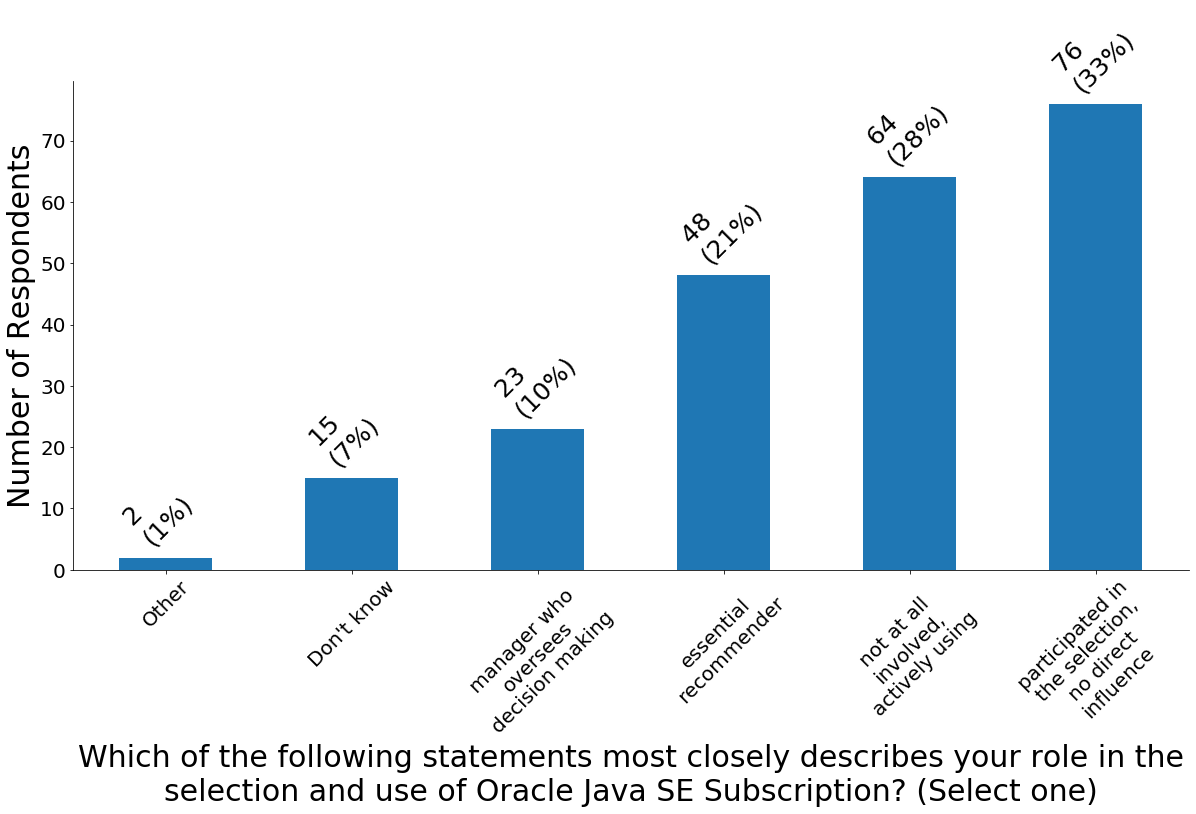

In [277]:
var = 'OracleJavaSESubscription_Ind_Role'
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp = temp[temp.freq<228]
temp.freq = temp.freq.astype('int')
temp = temp.iloc[:-1,]

var_str = temp.Q.values[0]
var_str = '\n'.join(wrap(var_str, 75))
temp.A_short =  [ '\n'.join(wrap(l, 15)) for l in temp.A_short ] 


ax = temp.iloc[:,].sort_values('freq').plot.bar(x='A_short', y='freq', 
                                                  rot=45, fontsize = 20,
                                                 legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
#     ax.set_xticks()
    ax.set_ylabel("Number of Respondents", size =30)
#     ax.get_legend().remove()
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

# Mapping Graph Additionals - grp_str
## used for var = ['Job_Title','OracleJavaSESubscription_Ind_Role']

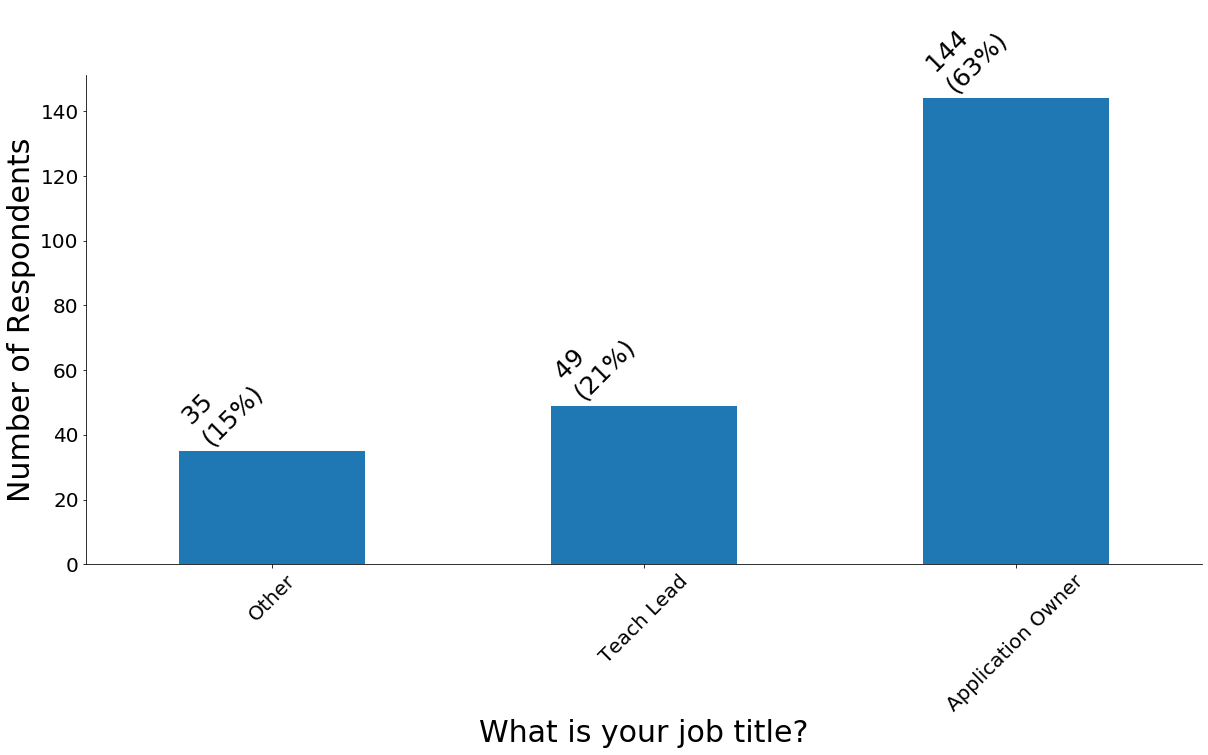

In [191]:
# job title by group
var = 'Job_Title'
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp = temp[temp.freq<228]
temp.freq = temp.freq.astype('int')
temp = temp.groupby(['var',  'Q','grp', 'grp_str'],as_index=False)['freq'].agg('sum')

var_str = temp.Q.values[0]


ax = temp.iloc[:,].sort_values('freq').plot.bar(x='grp_str', y='freq', 
                                                  rot=45, fontsize = 20,
                                                 legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
#     ax.get_legend().remove()
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

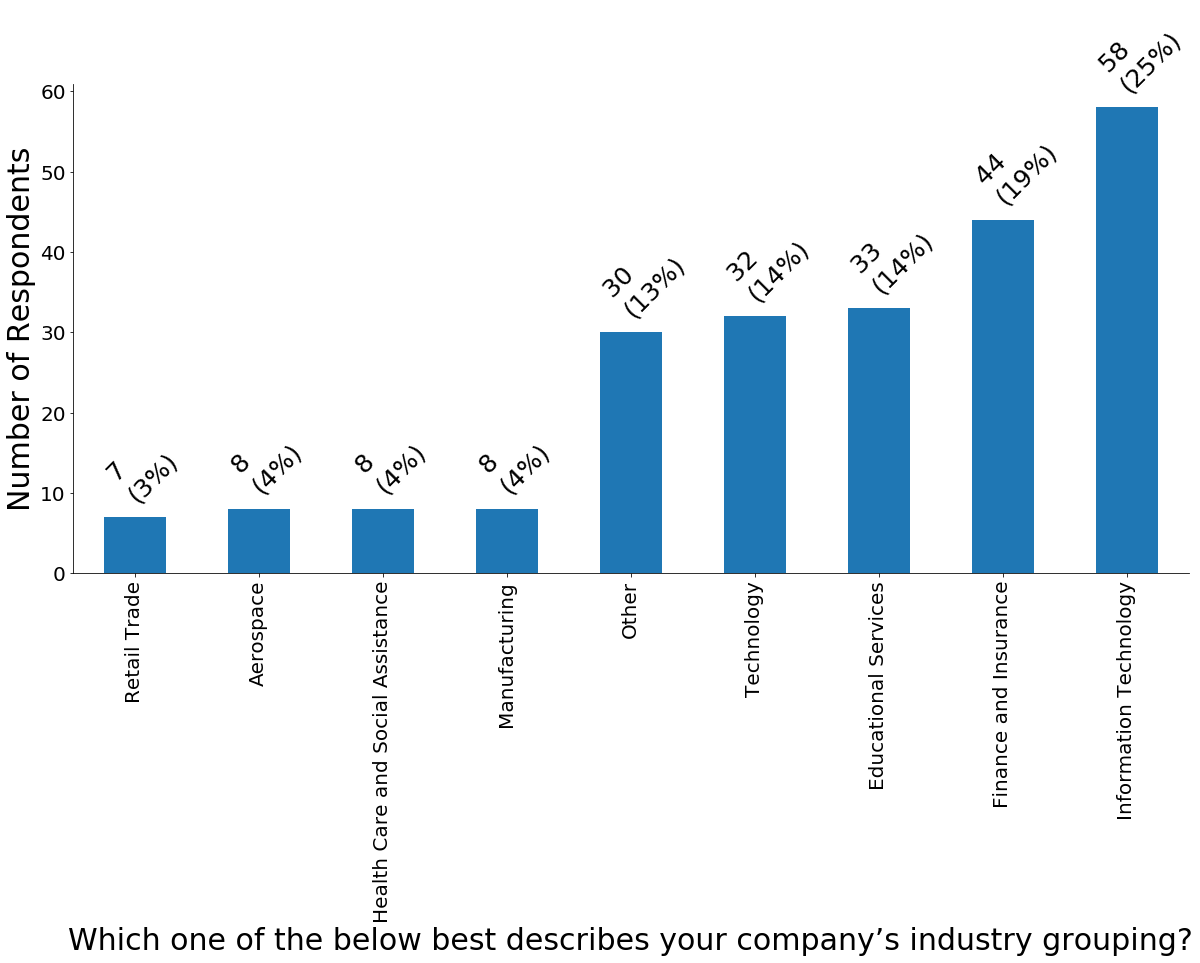

In [105]:
# job title by group
var = 'Company_Industry'
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp = temp[temp.freq<228]
temp.freq = temp.freq.astype('int')
temp = temp.groupby(['var',  'Q','grp', 'grp_str'],as_index=False)['freq'].agg('sum')
temp= temp.sort_values('freq')

var_str = temp.Q.values[0]


ax = temp.iloc[:,].plot.bar(x='grp_str', y='freq',  fontsize = 20,
                                                 legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
#     ax.get_legend().remove()
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

In [107]:
# temp = temp.reset_index(drop=True)
temp = temp.reindex(index = [4,0,1,2,3,4,5,6,7,8])
temp = temp.sort_index()
temp

,var,Q,grp,grp_str,freq
0,Company_Industry,Which one of the below best describes your company’s industry grouping?,1.0,Retail Trade,7
1,Company_Industry,Which one of the below best describes your company’s industry grouping?,1.0,Aerospace,8
2,Company_Industry,Which one of the below best describes your company’s industry grouping?,1.0,Health Care and Social Assistance,8
3,Company_Industry,Which one of the below best describes your company’s industry grouping?,1.0,Manufacturing,8
4,Company_Industry,Which one of the below best describes your company’s industry grouping?,0.0,Other,30
4,Company_Industry,Which one of the below best describes your company’s industry grouping?,0.0,Other,30
5,Company_Industry,Which one of the below best describes your company’s industry grouping?,1.0,Technology,32
6,Company_Industry,Which one of the below best describes your company’s industry grouping?,1.0,Educational Services,33
7,Company_Industry,Which one of the below best describes your company’s industry grouping?,1.0,Finance and Insurance,44
8,Company_Industry,Which one of the below best describes your company’s industry grouping?,1.0,Information Technology,58


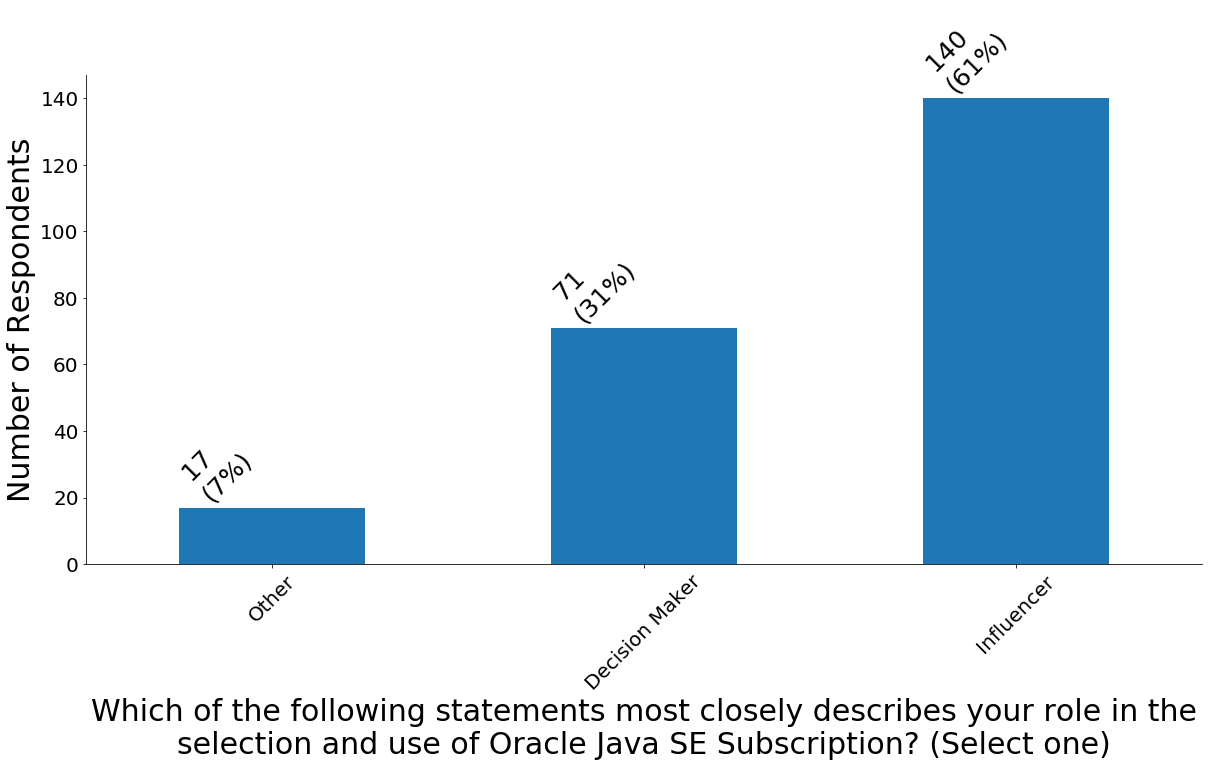

In [238]:
# job title by group
var = 'OracleJavaSESubscription_Ind_Role'
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp = temp[temp.freq<228]
temp.freq = temp.freq.astype('int')
temp = temp.groupby(['var',  'Q','grp', 'grp_str'],as_index=False)['freq'].agg('sum')

var_str = temp.Q.values[0]
var_str = '\n'.join(wrap(var_str, 75))

ax = temp.iloc[:,].sort_values('freq').plot.bar(x='grp_str', y='freq', 
                                                  rot=45, fontsize = 20,
                                                 legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
#     ax.get_legend().remove()
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

In [189]:
temp.groupby(['var',  'Q','grp', 'grp_str'],as_index=False)['freq'].agg('sum')

,var,Q,grp,grp_str,freq
0,Job_Title,What is your job title?,1.0,Teach Lead,49
1,Job_Title,What is your job title?,2.0,Application Owner,144
2,Job_Title,What is your job title?,3.0,Other,35


In [63]:
modw_df.filter(regex=var).sum().sort_values(ascending=True)

Job_Title_Other      0.0
Job_Title_1          7.0
Job_Title_4         18.0
Job_Title_5         34.0
Job_Title_8         35.0
Job_Title_2         42.0
Job_Title_3         92.0
Job_Title          889.0
dtype: float64

# Number of individuals selecting OJavaSESubscription_Alts_Top3_ options

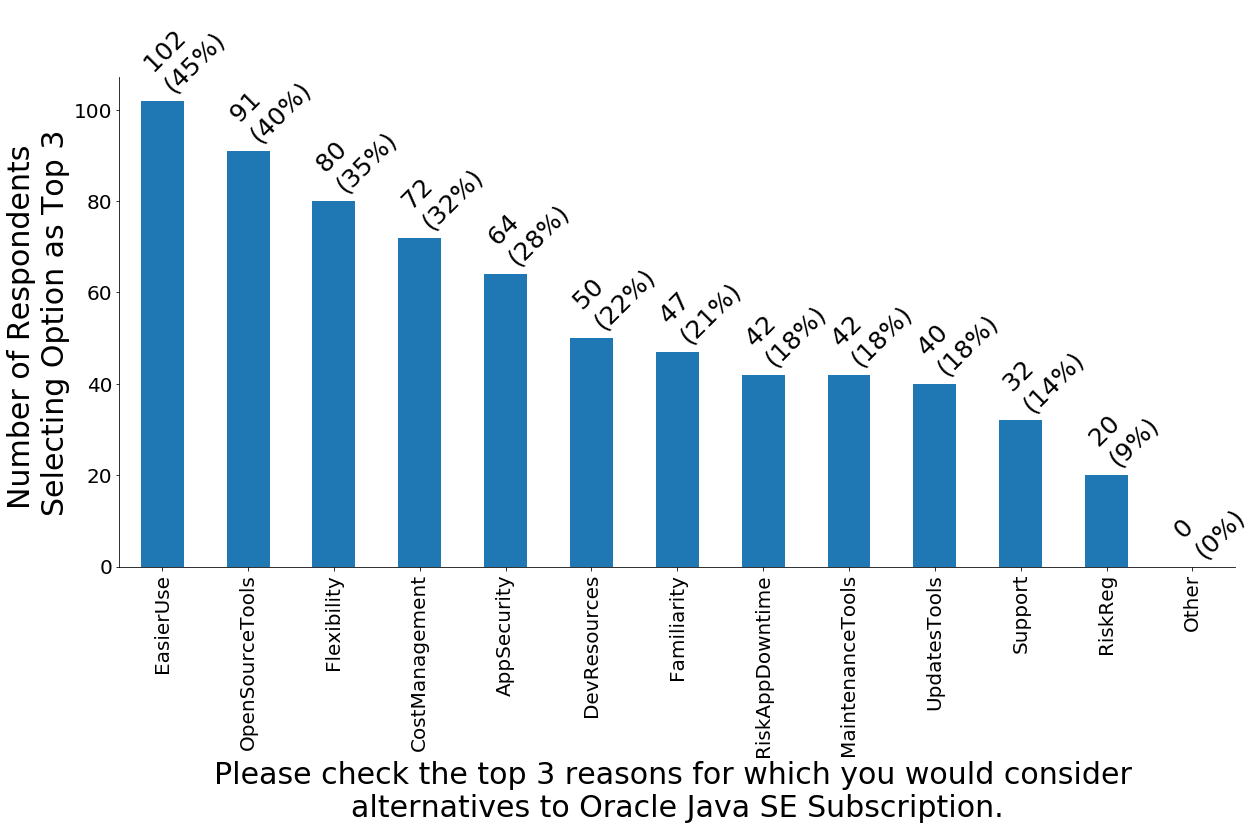

In [31]:
temp = modw_df.filter(regex='OJavaSESubscription_Alts_Top3_').sum().sort_values(ascending=False)
temp = temp.rename(lambda x: x.replace('OJavaSESubscription_Alts_Top3_',''))
ax = temp.plot.bar(fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height().astype(int), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("Please check the top 3 reasons for which you would consider \nalternatives to Oracle Java SE Subscription.", size =30)
    ax.set_ylabel("Number of Respondents \nSelecting Option as Top 3", size =30)
#     ax.get_legend().remove()
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

In [73]:
pd.options.display.float_format = '{:.2f}'.format

In [100]:
all_resp = pd.DataFrame(temp)#/228)
all_resp.columns = ['All Resp.']
all_resp

,All Resp.
EasierUse,102.00
OpenSourceTools,91.00
Flexibility,80.00
CostManagement,72.00
AppSecurity,64.00
DevResources,50.00
Familiarity,47.00
RiskAppDowntime,42.00
MaintenanceTools,42.00
UpdatesTools,40.00


In [101]:
idx = all_resp.index
idx

Index(['EasierUse', 'OpenSourceTools', 'Flexibility', 'CostManagement', 'AppSecurity', 'DevResources', 'Familiarity', 'RiskAppDowntime', 'MaintenanceTools', 'UpdatesTools', 'Support', 'RiskReg', 'Other'], dtype='object')

In [108]:
job_title = modw_df.filter(regex='OJavaSESubscription_Alts_Top3_|Job_Title').groupby('Job_Title'
                ).sum().filter(regex='OJavaSESubscription_Alts_Top3_')

job_title

,OJavaSESubscription_Alts_Top3_MaintenanceTools,OJavaSESubscription_Alts_Top3_UpdatesTools,OJavaSESubscription_Alts_Top3_CostManagement,OJavaSESubscription_Alts_Top3_Flexibility,OJavaSESubscription_Alts_Top3_Familiarity,OJavaSESubscription_Alts_Top3_EasierUse,OJavaSESubscription_Alts_Top3_OpenSourceTools,OJavaSESubscription_Alts_Top3_Support,OJavaSESubscription_Alts_Top3_AppSecurity,OJavaSESubscription_Alts_Top3_DevResources,OJavaSESubscription_Alts_Top3_RiskReg,OJavaSESubscription_Alts_Top3_RiskAppDowntime,OJavaSESubscription_Alts_Top3_Other
Job_Title,,,,,,,,,,,,,
1,1.00,0.00,1.00,5.00,2.00,2.00,3.00,3.00,3.00,1.00,0.00,0.00,0.00
2,10.00,6.00,18.00,13.00,9.00,16.00,13.00,5.00,15.00,7.00,0.00,13.00,0.00
3,10.00,16.00,21.00,35.00,21.00,49.00,41.00,7.00,25.00,17.00,15.00,18.00,0.00
4,6.00,5.00,6.00,5.00,1.00,8.00,7.00,4.00,4.00,3.00,1.00,4.00,0.00
5,7.00,4.00,10.00,8.00,4.00,15.00,18.00,6.00,10.00,16.00,3.00,1.00,0.00
8,8.00,9.00,16.00,14.00,10.00,12.00,9.00,7.00,7.00,6.00,1.00,6.00,0.00


In [110]:
modw_df.groupby('Job_Title').count()

,Response_ID,IP_Address,Timestamp,Duplicate,Time_Complete_s,Seq._Number,External_Reference,Custom_Variable_1,Custom_Variable_2,Custom_Variable_3,Custom_Variable_4,Custom_Variable_5,Respondent_Email,Email_List,Country_Code,Region,Survey_Pre_Qual,Job_Title_Other,Company_Industry,Company_Industry_Other],Company_Revenue,OracleJavaSESubscription_Org_Duration,Java_App_Org_Deploy_2020,OracleJavaSESubscription_Ind_Role,OracleJavaSESubscription_Ind_Role_Other,Survey_Consent,Government_Org_Ind_Employee,Gift_Card_Confirm,Company_Name,Thank_You,Title,Country,State,App_Dev_Outsource,Java_Dev_Org,Java_Dev_Dist_Org,Java_Dev_Dist_JVM,Java_Dev_Dist_Python,Java_Dev_Dist_JavaScript,Platform_Dev_Org_Primary,Platform_Dev_Org_Comment,Platform_Dev_Org_LRHEL_P,Platform_Dev_Org_LOracle_P,Platform_Dev_Org_LUbuntu_P,Platform_Dev_Org_LSUSE_P,Platform_Dev_Org_LinuxOther_P,Platform_Dev_Org_MacOS_P,Platform_Dev_Org_Solaris_P,Platform_Dev_Org_Windows_P,Platform_Dev_Org_LinuxOther_Comment,Use_Org_EclipseIDE,Sat_Org_EclipseIDE,Use_Org_IntelliJIDE,Sat_Org_IntelliJIDE,Use_Org_JDeveloper,Sat_Org_JDeveloper,Use_Org_NetBeansIDE,Sat_Org_NetBeansIDE,Use_Org_RationalAppDev,Sat_Org_RationalAppDev,Use_Org_VisualStudio,Sat_Org_VisualStudio,Use_Org_Other,Sat_Org_Other,Use_Sat_Org_Other_Comment,Use_Org_JavaSEAMC,Sat_Org_JavaSEAMC,Use_Org_JavaSEAMC_UsageLog,Sat_Org_JavaSEAMC_UsageLog,Use_Org_JavaSEDepRuleSet,Sat_Org_JavaSEDepRuleSet,Use_Org_JavaSEMSICustTools,Sat_Org_JavaSEMSICustTools,Use_Org_JavaSEFlightRec,Sat_Org_JavaSEFlightRec,JavaSESub_PrePurchasePeriod,Information_Channel_Imp_OWebsites,Information_Channel_Imp_OSalesPros,Information_Channel_Imp_OMarketing,Information_Channel_Imp_Blogs,Information_Channel_Imp_ExtConsultants,Information_Channel_Imp_SocialMedia,Information_Channel_Imp_UserComm,Information_Channel_Imp_IndustryPubs,Information_Channel_Imp_PeerRec,Information_Channel_Imp_Other,Information_Channel_Imp_Other_Comment,OJavaSESubscription_Elem_Imp_Org_ContinuedInvest,OJavaSESubscription_Elem_Sat_Org_ContinuedInvest,OJavaSESubscription_Elem_Imp_Org_PatchesOlderV,OJavaSESubscription_Elem_Sat_Org_PatchesOlderV,OJavaSESubscription_Elem_Imp_Org_JavaWebStartUpdates,OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates,OJavaSESubscription_Elem_Imp_Org_DesktopManageUpdates,OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates,OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools,OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools,OJavaSESubscription_Elem_Imp_Org_Monitoring,OJavaSESubscription_Elem_Sat_Org_Monitoring,OJavaSESubscription_Elem_Imp_Org_MyOSupport,OJavaSESubscription_Elem_Sat_Org_MyOSupport,OJavaSESubscription_Elem_Imp_Org_AccessCloud,OJavaSESubscription_Elem_Sat_Org_AccessCloud,OJavaSESubscription_Elem_Imp_Org_FlexLicensing,OJavaSESubscription_Elem_Sat_Org_FlexLicensing,OJavaSESubscription_Elem_Imp_Org_LegacyJava,OJavaSESubscription_Elem_Sat_Org_LegacyJava,OJavaSESubscription_Elem_Imp_Org_Other,OJavaSESubscription_Elem_Sat_Org_Other,OJavaSESubscription_Elem_Imp_Sat_Org_Other_Comment,OJavaSESubscription_Attr_Imp_CommMethods,OJavaSESubscription_Attr_Sat_CommMethods,OJavaSESubscription_Attr_Imp_PhoneSupport,OJavaSESubscription_Attr_Sat_PhoneSupport,OJavaSESubscription_Attr_Imp_SSKnowledge,OJavaSESubscription_Attr_Sat_SSKnowledge,OJavaSESubscription_Attr_Imp_CoNeedsUnd,OJavaSESubscription_Attr_Sat_CoNeedsUnd,OJavaSESubscription_Attr_Imp_TrainingQual,OJavaSESubscription_Attr_Sat_TrainingQual,OJavaSESubscription_Attr_Imp_RepsonseTime,OJavaSESubscription_Attr_Sat_RepsonseTime,OJavaSESubscription_OrgPurch_Imp_StaffExp,OJavaSESubscription_OrgPurch_Imp_PrPerRatio,OJavaSESubscription_OrgPurch_Imp_TotalCost,OJavaSESubscription_OrgPurch_Imp_LargeEcosystem,OJavaSESubscription_OrgPurch_Imp_VendorSupport,OJavaSESubscription_OrgPurch_Imp_InnovationPotential,OJavaSESubscription_OrgPurch_Imp_LowerRisk,OJavaSESubscription_OrgPurch_Imp_RegulatoryCompliance,OJavaSESubscription_OrgPurch_Imp_MarketTrends,OJavaSESubscription_OrgPurch_Imp_Competition,OJavaSESubscription_OrgPurch_Imp_HigherA

In [119]:
pd.DataFrame(mod_df.groupby('Job_Title')['Response_ID'].count()).merge(varkey[varkey['var']==
    'Job_Title'][['val','A']], left_index=True, right_on='val')[["A","Response_ID"]]

,A,Response_ID
0,CIO or CTO,7
1,IT Director or Manager,42
2,Application Developer,92
3,Application Manager,18
4,Application Development Lead,34
7,Other (Please specify),35


In [106]:
varkey[varkey['var']=='Job_Title']

,var,val,Q,A,A_short,grp,grp_str
0,Job_Title,1,What is your job title?,CIO or CTO,NaN,1.00,Teach Lead
1,Job_Title,2,What is your job title?,IT Director or Manager,NaN,1.00,Teach Lead
2,Job_Title,3,What is your job title?,Application Developer,NaN,2.00,Application Owner
3,Job_Title,4,What is your job title?,Application Manager,NaN,2.00,Application Owner
4,Job_Title,5,What is your job title?,Application Development Lead,NaN,2.00,Application Owner
5,Job_Title,6,What is your job title?,Member of Procurement or Purchasing Dpt.,NaN,3.00,Other
6,Job_Title,7,What is your job title?,Don't know,NaN,3.00,Other
7,Job_Title,8,What is your job title?,Other (Please specify),NaN,3.00,Other


In [102]:
job_title = modw_df.filter(regex='OJavaSESubscription_Alts_Top3_|Job_Title').groupby('Job_Title'
                ).sum().filter(regex='OJavaSESubscription_Alts_Top3_')
job_title = job_title.merge(varkey[varkey['var']=='Job_Title'][['val','A']], left_index=True, right_on='val')
job_title.columns = [x.replace('OJavaSESubscription_Alts_Top3_','') for x in job_title.columns]
job_title = job_title.drop(columns=['val'])
job_title = job_title.set_index('A').transpose()
job_title = job_title#/job_title.sum()
job_title = job_title.reindex(index =idx)
job_title

A,CIO or CTO,IT Director or Manager,Application Developer,Application Manager,Application Development Lead,Other (Please specify)
EasierUse,2.00,16.00,49.00,8.00,15.00,12.00
OpenSourceTools,3.00,13.00,41.00,7.00,18.00,9.00
Flexibility,5.00,13.00,35.00,5.00,8.00,14.00
CostManagement,1.00,18.00,21.00,6.00,10.00,16.00
AppSecurity,3.00,15.00,25.00,4.00,10.00,7.00
DevResources,1.00,7.00,17.00,3.00,16.00,6.00
Familiarity,2.00,9.00,21.00,1.00,4.00,10.00
RiskAppDowntime,0.00,13.00,18.00,4.00,1.00,6.00
MaintenanceTools,1.00,10.00,10.00,6.00,7.00,8.00
UpdatesTools,0.00,6.00,16.00,5.00,4.00,9.00


In [103]:
sel_role = modw_df.filter(regex='OJavaSESubscription_Alts_Top3_|OracleJavaSESubscription_Ind_Role').groupby(
    'OracleJavaSESubscription_Ind_Role').sum().filter(regex='OJavaSESubscription_Alts_Top3_')
sel_role = sel_role.merge(varkey[varkey['var']=='OracleJavaSESubscription_Ind_Role'][['val','A']], left_index=True, right_on='val')
sel_role.columns = [x.replace('OJavaSESubscription_Alts_Top3_','') for x in sel_role.columns]
sel_role = sel_role.drop(columns=['val'])
sel_role = sel_role.set_index('A').transpose()
sel_role = sel_role#/sel_role.sum()
sel_role = sel_role.reindex(index =idx)
sel_role

A,"I was not at all involved in the evaluation or selection of Oracle Java SE Subscription, but I am actively using the product for managing Java applications",I participated in the selection of development platform but do not have direct influence over the selection,I was an essential recommender on selection of Oracle Java SE Subscription,I am a manager who oversees decision making involving selection of Oracle Java SE Subscription,Don't know,Other
EasierUse,30.00,32.00,25.00,7.00,8.00,0.00
OpenSourceTools,24.00,31.00,16.00,13.00,7.00,0.00
Flexibility,22.00,29.00,17.00,5.00,7.00,0.00
CostManagement,21.00,21.00,18.00,7.00,3.00,2.00
AppSecurity,11.00,26.00,16.00,5.00,6.00,0.00
DevResources,13.00,18.00,10.00,5.00,4.00,0.00
Familiarity,17.00,11.00,8.00,6.00,4.00,1.00
RiskAppDowntime,12.00,17.00,7.00,4.00,1.00,1.00
MaintenanceTools,18.00,9.00,7.00,5.00,2.00,1.00
UpdatesTools,7.00,18.00,7.00,6.00,2.00,0.00


In [104]:
final_df = all_resp.merge(job_title, left_index=True, right_index=True).merge(
    sel_role, left_index=True, right_index=True)
final_df

,All Resp.,CIO or CTO,IT Director or Manager,Application Developer,Application Manager,Application Development Lead,Other (Please specify),"I was not at all involved in the evaluation or selection of Oracle Java SE Subscription, but I am actively using the product for managing Java applications",I participated in the selection of development platform but do not have direct influence over the selection,I was an essential recommender on selection of Oracle Java SE Subscription,I am a manager who oversees decision making involving selection of Oracle Java SE Subscription,Don't know,Other
EasierUse,102.00,2.00,16.00,49.00,8.00,15.00,12.00,30.00,32.00,25.00,7.00,8.00,0.00
OpenSourceTools,91.00,3.00,13.00,41.00,7.00,18.00,9.00,24.00,31.00,16.00,13.00,7.00,0.00
Flexibility,80.00,5.00,13.00,35.00,5.00,8.00,14.00,22.00,29.00,17.00,5.00,7.00,0.00
CostManagement,72.00,1.00,18.00,21.00,6.00,10.00,16.00,21.00,21.00,18.00,7.00,3.00,2.00
AppSecurity,64.00,3.00,15.00,25.00,4.00,10.00,7.00,11.00,26.00,16.00,5.00,6.00,0.00
DevResources,50.00,1.00,7.00,17.00,3.00,16.00,6.00,13.00,18.00,10.00,5.00,4.00,0.00
Familiarity,47.00,2.00,9.00,21.00,1.00,4.00,10.00,17.00,11.00,8.00,6.00,4.00,1.00
RiskAppDowntime,42.00,0.00,13.00,18.00,4.00,1.00,6.00,12.00,17.00,7.00,4.00,1.00,1.00
MaintenanceTools,42.00,1.00,10.00,10.00,6.00,7.00,8.00,18.00,9.00,7.00,5.00,2.00,1.00
UpdatesTools,40.00,0.00,6.00,16.00,5.00,4.00,9.00,7.00,18.00,7.00,6.00,2.00,0.00


In [105]:
final_df.to_csv('../data/output/top3_alt_counts.csv')